In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('stock_tweets.csv')

In [3]:
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [5]:
df['Stock Name'].unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [4]:
df.shape

(80793, 4)

In [5]:
df.describe()

,Date,Tweet,Stock Name,Company Name
count,80793,80793,80793,80793
unique,64424,64479,25,25
top,2022-07-07 18:32:41+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,14,25,37422,37422


In [6]:
df.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import unicodedata

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
analyzer = SentimentIntensityAnalyzer()

In [10]:
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))  
    return pd.Series([sentiment['compound'], sentiment['neg'], sentiment['neu'], sentiment['pos']])



In [11]:
df[['sentiment_score', 'Negative', 'Neutral', 'Positive']] = df['Tweet'].apply(get_sentiment)

In [12]:
df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.127,0.758,0.115
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,0.000,1.000,0.000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.000,0.951,0.049
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.273,0.590,0.137
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,0.526,0.474,0.000


## Take "AMAZON" as example stock

In [13]:
stock_name = 'AMZN'

In [14]:
amzn_df = df[df['Stock Name'] == stock_name].copy()

In [15]:
amzn_df

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29 22:40:47+00:00,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.2500,0.158,0.684,0.158
48353,2022-09-29 18:34:51+00:00,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29 15:57:59+00:00,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.000,0.799,0.201
...,...,...,...,...,...,...,...,...
52435,2021-09-30 20:50:16+00:00,My top 10 holdings make up 66% of my portfolio...,AMZN,"Amazon.com, Inc.",0.4515,0.000,0.928,0.072
52436,2021-09-30 19:45:13+00:00,Amazon $AMZN has 4X the market cap of Alibaba ...,AMZN,"Amazon.com, Inc.",-0.5106,0.095,0.873,0.032
52437,2021-09-30 18:01:19+00:00,Returns over the last 10 Years:\n\nBitcoin $BT...,AMZN,"Amazon.com, Inc.",-0.2263,0.089,0.821,0.091
52438,2021-09-30 17:56:14+00:00,Great snapshot of what it looks like when an i...,AMZN,"Amazon.com, Inc.",0.9369,0.000,0.740,0.260


In [16]:
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

In [17]:
amzn_df['Date'] = amzn_df['Date'].dt.date

In [18]:
amzn_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.2500,0.158,0.684,0.158
48353,2022-09-29,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.000,0.799,0.201


In [19]:
#amzn_df = amzn_df.drop(columns=['Negative', 'Positive', 'Neutral', 'Stock Name', 'Company Name'])

In [20]:
amzn_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
48351,2022-09-29,A group of lawmakers led by Sen. Elizabeth War...,AMZN,"Amazon.com, Inc.",-0.0772,0.084,0.841,0.075
48352,2022-09-29,$NIO just because I'm down money doesn't mean ...,AMZN,"Amazon.com, Inc.",0.2500,0.158,0.684,0.158
48353,2022-09-29,Today’s drop in $SPX is a perfect example of w...,AMZN,"Amazon.com, Inc.",-0.3182,0.164,0.728,0.108
48354,2022-09-29,Druckenmiller owned $CVNA this year \nMunger b...,AMZN,"Amazon.com, Inc.",0.2382,0.065,0.851,0.083
48355,2022-09-29,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,AMZN,"Amazon.com, Inc.",0.7783,0.000,0.799,0.201


In [21]:
daily_sentiment = amzn_df.groupby([amzn_df['Date']]).mean()

C:\Users\anike\AppData\Local\Temp\ipykernel_33548\1377599802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sentiment = amzn_df.groupby([amzn_df['Date']]).mean()


In [22]:
daily_sentiment.head()

,sentiment_score,Negative,Neutral,Positive
Date,,,,
2021-09-30,0.246480,0.036800,0.824200,0.139200
2021-10-01,0.359337,0.021875,0.863750,0.114375
2021-10-02,-0.000700,0.056333,0.846667,0.097000
2021-10-03,0.834400,0.000000,0.830000,0.170000
2021-10-04,0.258650,0.015583,0.883750,0.100583


In [23]:
all_stocks = pd.read_csv('stock_yfinance_data.csv')
print(all_stocks.shape)
all_stocks.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [24]:
stock_df = all_stocks[all_stocks['Stock Name'] == 'AMZN']

In [25]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
1008,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN
1009,2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN
1010,2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN
1011,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN
1012,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN
...,...,...,...,...,...,...,...,...
1255,2022-09-23,116.000000,116.050003,112.059998,113.779999,113.779999,65126700,AMZN
1256,2022-09-26,113.300003,117.339996,113.129997,115.150002,115.150002,62723300,AMZN
1257,2022-09-27,117.199997,118.320000,113.050003,114.410004,114.410004,60094700,AMZN
1258,2022-09-28,114.379997,118.699997,113.800003,118.010002,118.010002,55763800,AMZN


In [26]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

C:\Users\anike\AppData\Local\Temp\ipykernel_33548\3629404903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Date'] = pd.to_datetime(stock_df['Date'])


In [27]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
1008,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN
1009,2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN
1010,2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN
1011,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN
1012,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN


In [28]:
stock_df.set_index('Date', inplace=True)

In [29]:
merged_df = stock_df.merge(daily_sentiment, left_index=True, right_index=True, how='inner')


In [30]:
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Stock Name,sentiment_score,Negative,Neutral,Positive
Date,,,,,,,,,,,
2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,AMZN,0.246480,0.036800,0.824200,0.139200
2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000,AMZN,0.359337,0.021875,0.863750,0.114375
2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,AMZN,0.258650,0.015583,0.883750,0.100583
2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000,AMZN,0.045500,0.059667,0.892167,0.048167
2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000,AMZN,0.194300,0.024714,0.918286,0.057000


In [31]:
merged_df['MA10'] = merged_df['Close'].rolling(window=10).mean()
merged_df['MA30'] = merged_df['Close'].rolling(window=30).mean()


In [32]:
print(merged_df.corr()['Close'].sort_values(ascending=False))


C:\Users\anike\AppData\Local\Temp\ipykernel_33548\3919394640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(merged_df.corr()['Close'].sort_values(ascending=False))


Close              1.000000
Adj Close          1.000000
Low                0.996638
High               0.996538
Open               0.991707
MA10               0.957614
MA30               0.849661
Neutral            0.135566
sentiment_score    0.094554
Positive          -0.043672
Negative          -0.144453
Volume            -0.215750
Name: Close, dtype: float64


C:\Users\anike\AppData\Local\Temp\ipykernel_33548\3699120657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr())


<Axes: >

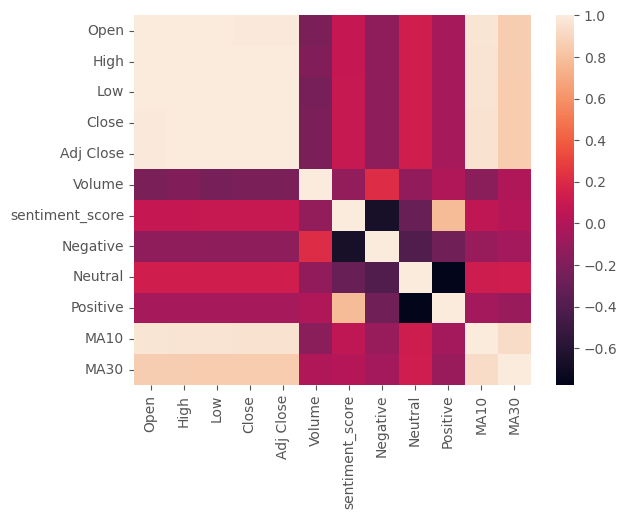

In [33]:
sns.heatmap(merged_df.corr())

In [34]:
scaled_df= merged_df[['sentiment_score', 'Negative', 'Neutral', 'Positive','Close']]

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df[['sentiment_score', 'Negative', 'Neutral', 'Positive']] = scaler.fit_transform(scaled_df[['sentiment_score', 'Negative', 'Neutral', 'Positive']])

C:\Users\anike\AppData\Local\Temp\ipykernel_33548\149008238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[['sentiment_score', 'Negative', 'Neutral', 'Positive']] = scaler.fit_transform(scaled_df[['sentiment_score', 'Negative', 'Neutral', 'Positive']])


In [36]:
scaled_df.describe()

,sentiment_score,Negative,Neutral,Positive,Close
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.595963,0.244277,0.490183,0.454929,144.572167
std,0.113273,0.163715,0.182853,0.172068,23.068358
min,0.000000,0.000000,0.000000,0.000000,102.309998
25%,0.538715,0.134587,0.372429,0.348372,123.397499
50%,0.599086,0.218829,0.509433,0.447679,147.092003
75%,0.664639,0.328855,0.606478,0.556256,165.025124
max,1.000000,1.000000,1.000000,1.000000,184.802994


In [37]:
features= scaled_df[['sentiment_score', 'Negative', 'Neutral', 'Positive']]
target = scaled_df['Close']  

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Using RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [44]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 22.064219034232348
RMSE: 25.545303317218313


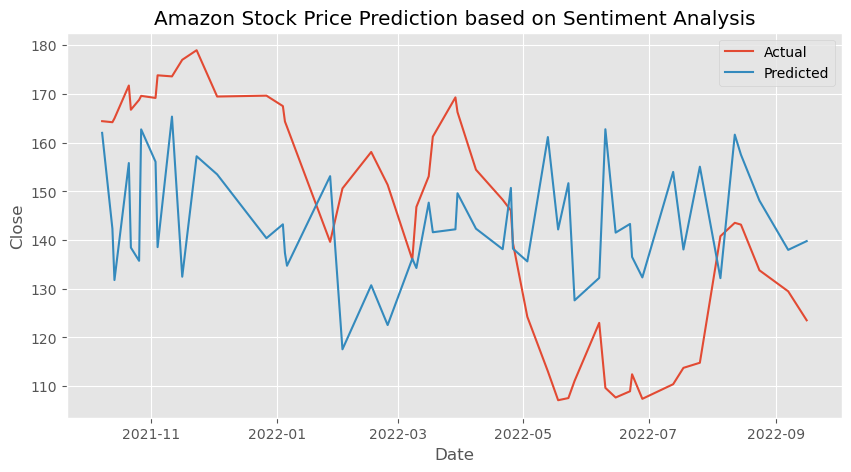

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(x=y_test.index, y=y_test, label='Actual')
sns.lineplot(x=y_test.index, y=y_pred, label='Predicted')
plt.legend()
plt.title("Amazon Stock Price Prediction based on Sentiment Analysis")
plt.show()


## Using LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [49]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 20.622968237936156
RMSE: 23.687259650537566


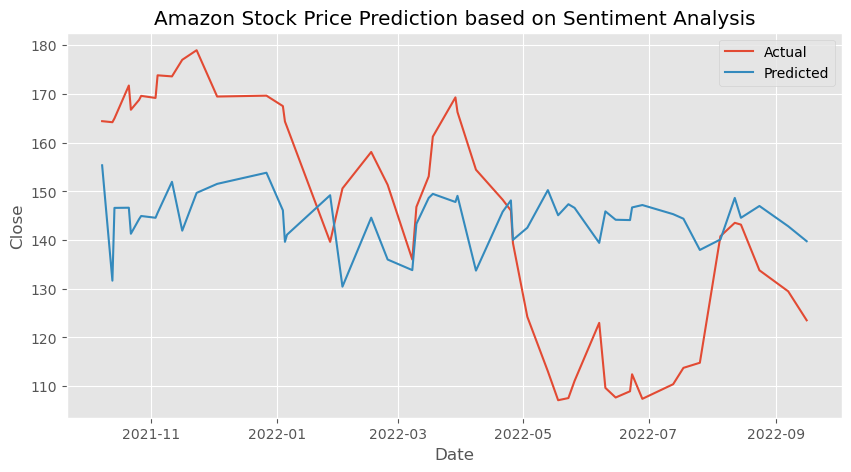

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(x=y_test.index, y=y_test, label='Actual')
sns.lineplot(x=y_test.index, y=y_pred, label='Predicted')
plt.legend()
plt.title("Amazon Stock Price Prediction based on Sentiment Analysis")
plt.show()


## Using LSTM

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [58]:
features = [ 'sentiment_score', 'Negative', 'Neutral', 'Positive']
target = 'Close'

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[features + [target]])


In [59]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1]) 
        y.append(data[i+seq_length, -1])   
    return np.array(X), np.array(y)

In [60]:
seq_length = 10  
X, y = create_sequences(scaled_data, seq_length)

In [61]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [62]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])


C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2804 - val_loss: 0.0740
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0931 - val_loss: 0.0778
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0930 - val_loss: 0.0913
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0912 - val_loss: 0.0443
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0844 - val_loss: 0.0295
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0870 - val_loss: 0.0481
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0857 - val_loss: 0.0510
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0951 - val_loss: 0.0694
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0837 - val_loss: 0.0605
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0862 - val_loss: 0.0750
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0782 - val_loss: 0.0436
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0767 - val_l

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step


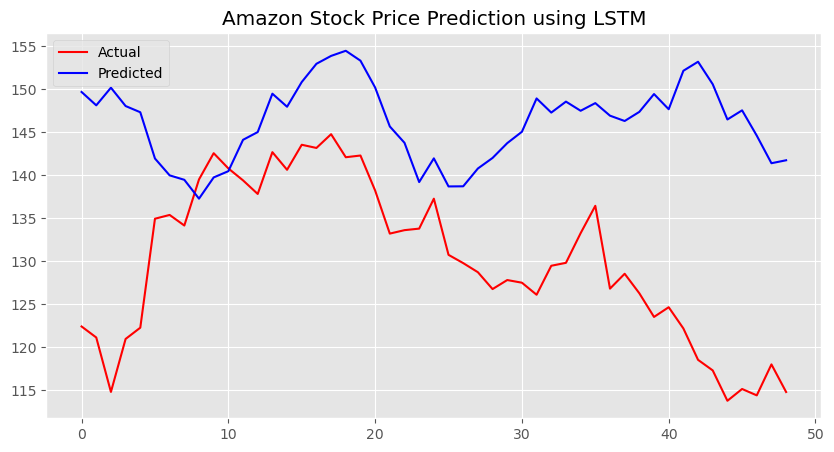

In [65]:
# Predict stock prices
y_pred = model.predict(X_test)

# Inverse transform only the target feature (Close price)
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred.reshape(-1, 1)), axis=1))[:, -1]

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(y_test_actual)), y=y_test_actual, label='Actual', color='red')
sns.lineplot(x=range(len(y_pred_actual)), y=y_pred_actual, label='Predicted', color='blue')
plt.legend()
plt.title("Amazon Stock Price Prediction using LSTM")
plt.show()


In [66]:
print(mean_squared_error(y_test,y_pred))

0.05346407492099679


In [67]:
print(mean_absolute_error(y_test,y_pred))

0.1976942502466045


In [68]:
print(mean_squared_error(y_test,y_pred)**0.5)

0.23122299825276202


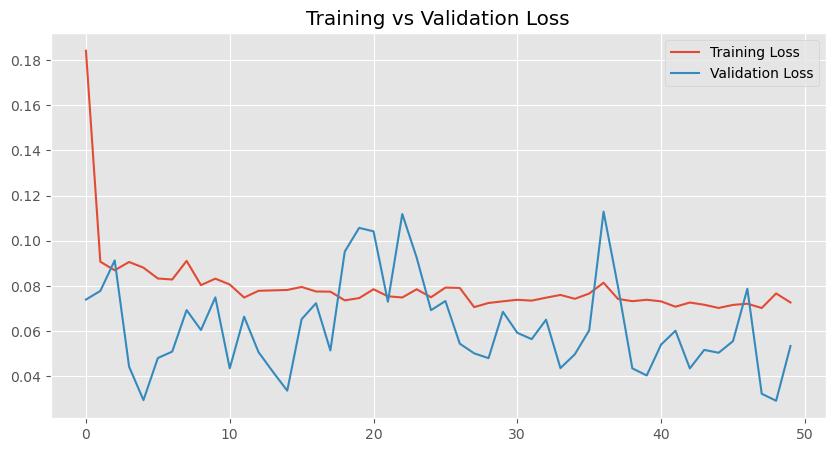

In [69]:
# Plot loss curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()